In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("Iris_Dataset.csv")


In [18]:
df.iloc[:, 2:4] = df.iloc[:, 2:4].astype(float)

In [19]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [20]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [21]:
X = df.iloc[:, 2:4].values  # Petal Length & Petal Width
y = (df["Species"] == 0).astype(int)

In [22]:
X = X.astype(float)
y = y.astype(int)


In [32]:
X[0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [33]:
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int32

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)
        self.errors = []

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            errors = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                self.weights[1:] += update * inputs
                self.weights[0] += update
                errors += int(update != 0)
            self.errors.append(errors)

    def plot_error_history(self):
        plt.plot(range(1, self.epochs + 1), self.errors, marker='o')
        plt.title('Perceptron Error Convergence')
        plt.xlabel('Epochs')
        plt.ylabel('Errors')
        plt.show()


In [25]:
perceptron = Perceptron(input_size=2)
perceptron.train(X_train, y_train)


In [26]:
min_error_epoch = np.argmin(perceptron.errors) + 1
print(f"Epoch with minimum error: {min_error_epoch}")

Epoch with minimum error: 8


In [29]:
print("Final weights:", perceptron.weights)

Final weights: [ 0.         -0.05072449  0.08664948]


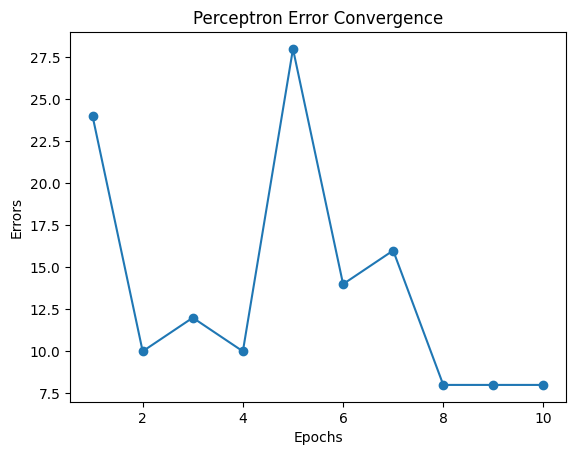

In [30]:
perceptron.plot_error_history()